# Download the libraries


In [1]:
!pip install tensorflow numpy opencv-python pillow scikit-learn


# Pre processing script

In [1]:
import os

import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Parameters
IMG_SIZE = 32  # Small size for speed
DATA_DIR = "data"
CATEGORIES = ["person", "military_person"]

# Load and preprocess images
def load_data():
    data = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)  # 0 for person, 1 for military_person
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                img_array = img_array / 255.0  # Normalize to [0, 1]
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image: {e}")
    return np.array(data), np.array(labels)

# Load data
X, y = load_data()

# Split into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")

Training samples: 261, Validation samples: 175


*Without Augmentation*

# Small CNN architecture without Dropout layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/opt/anaconda3/envs/object_detection_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,945 (308.38 KB)

 Trainable params: 78,945 (308.38 KB)

 Non-trainable params: 0 (0.00 B)

## Training using 10 epochs

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5527 - loss: 0.6835 - val_accuracy: 0.5943 - val_loss: 0.6657
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5894 - loss: 0.6637 - val_accuracy: 0.5657 - val_loss: 0.6362
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6923 - loss: 0.5932 - val_accuracy: 0.8114 - val_loss: 0.5278
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8512 - loss: 0.4629 - val_accuracy: 0.8171 - val_loss: 0.4407
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8884 - loss: 0.3976 - val_accuracy: 0.8114 - val_loss: 0.3828
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9007 - loss: 0.2993 - val_accuracy: 0.8057 - val_loss: 0.4242
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8442 - loss: 0.3395 - val_accuracy: 0.8457 - val_loss: 0.3566
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8917 - loss: 0.2847 - val_accuracy: 0.7771 - val_loss: 0.5445


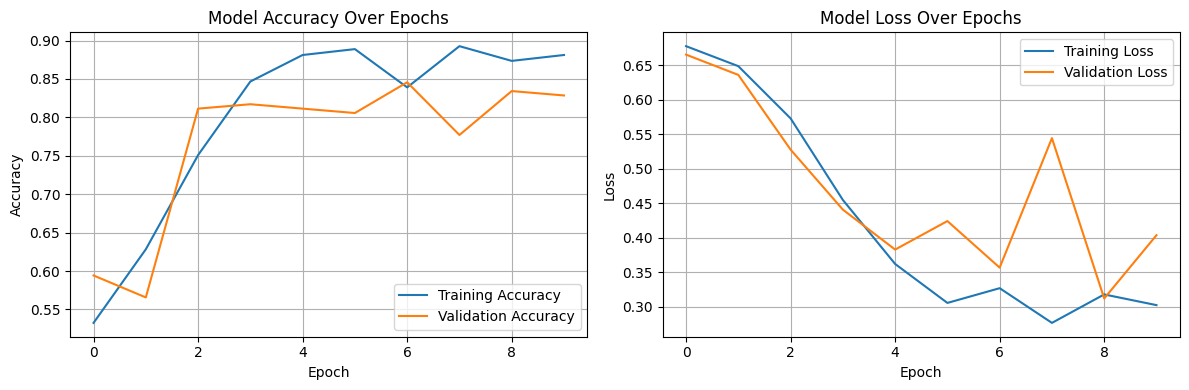

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

model.save("military_classifier_50_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot (optional, for extra insight)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Training using 20 epochs

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4940 - loss: 0.7012 - val_accuracy: 0.4857 - val_loss: 0.7164
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5598 - loss: 0.6746 - val_accuracy: 0.7886 - val_loss: 0.6353
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7408 - loss: 0.6079 - val_accuracy: 0.7657 - val_loss: 0.5672
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8523 - loss: 0.5126 - val_accuracy: 0.8171 - val_loss: 0.4697
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8338 - loss: 0.4205 - val_accuracy: 0.8171 - val_loss: 0.4205
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8799 - loss: 0.3576 - val_accuracy: 0.7829 - val_loss: 0.4261
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8311 - loss: 0.3581 - val_accuracy: 0.8286 - val_loss: 0.3829
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9000 - loss: 0.2883 - val_accuracy: 0.8629 - val_loss: 0.3268


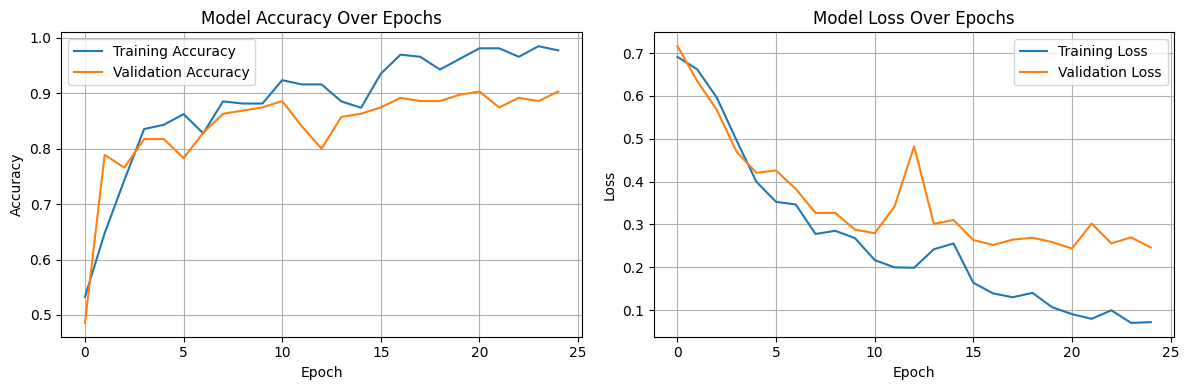

In [ ]:

history = model.fit(X_train, y_train, 
                    epochs=25, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

model.save("military_classifier_25_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# CNN architecture including a Dropout layer

## Updating the model architectuire with a dropout layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Heavier dropout for dense layer

        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    return model

model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/opt/anaconda3/envs/object_detection_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,609 (221.13 KB)

 Trainable params: 56,609 (221.13 KB)

 Non-trainable params: 0 (0.00 B)

## Training for 25 epochs

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4088 - loss: 0.7230 - val_accuracy: 0.6857 - val_loss: 0.6869
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6237 - loss: 0.6669 - val_accuracy: 0.5486 - val_loss: 0.6806
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5839 - loss: 0.6692 - val_accuracy: 0.7486 - val_loss: 0.6648
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6587 - loss: 0.6482 - val_accuracy: 0.7886 - val_loss: 0.6283
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6997 - loss: 0.6077 - val_accuracy: 0.7371 - val_loss: 0.5750
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6759 - loss: 0.5886 - val_accuracy: 0.7200 - val_loss: 0.5585
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7538 - loss: 0.4896 - val_accuracy: 0.7714 - val_loss: 0.5004
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7609 - loss: 0.4716 - val_accuracy: 0.8000 - val_loss: 0.4829


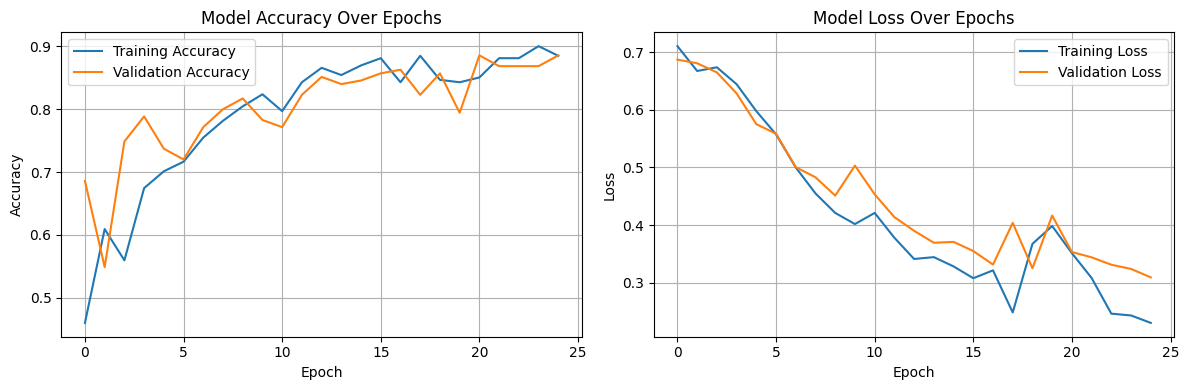

In [ ]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=25, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

model.save("military_classifier_25_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


## Train the model for 50 epochs


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4015 - loss: 0.7309 - val_accuracy: 0.5086 - val_loss: 0.6918
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5101 - loss: 0.6949 - val_accuracy: 0.4857 - val_loss: 0.6906
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5209 - loss: 0.6989 - val_accuracy: 0.6114 - val_loss: 0.6901
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5739 - loss: 0.6840 - val_accuracy: 0.7371 - val_loss: 0.6869
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4973 - loss: 0.7002 - val_accuracy: 0.7371 - val_loss: 0.6834
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5159 - loss: 0.6772 - val_accuracy: 0.7543 - val_loss: 0.6746
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6386 - loss: 0.6515 - val_accuracy: 0.7543 - val_loss: 0.6613
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6920 - loss: 0.6474 - val_accuracy: 0.7143 - val_loss: 0.6359


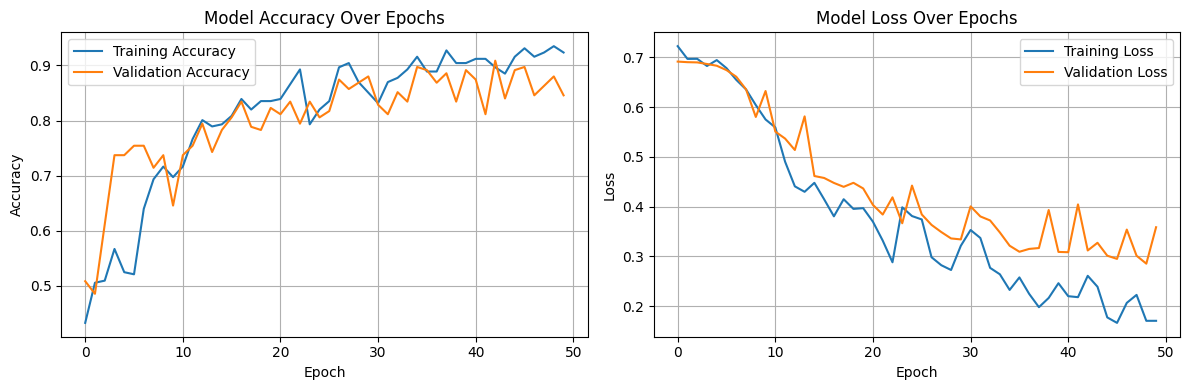

In [3]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

# Save the trained model
model.save("military_classifier_25_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot (optional, for extra insight)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


# MobileNetV1 Architecture

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
IMG_SIZE = 32

# Depthwise separable convolution block (as in original MobileNetV1)
def depthwise_separable_conv(x, filters, strides=(1, 1), alpha=1.0):
    """Alpha controls the width (number of filters) of the network."""
    depthwise_filters = int(filters * alpha)
    x = layers.DepthwiseConv2D(kernel_size=3, strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6.0)(x)  # ReLU6 as in MobileNetV1
    x = layers.Conv2D(depthwise_filters, kernel_size=1, strides=(1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6.0)(x)
    return x

# Build the modified MobileNetV1 model
def create_mobilenet_v1():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Initial standard convolution (adjusted for 32x32 input)
    x = layers.Conv2D(32, kernel_size=3, strides=(2, 2), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6.0)(x)  # ReLU6
    
    # MobileNetV1 body (reduced layers for simplicity and small input)
    x = depthwise_separable_conv(x, filters=64, strides=(1, 1))   # 16x16
    x = depthwise_separable_conv(x, filters=128, strides=(2, 2))  # 8x8
    x = depthwise_separable_conv(x, filters=128, strides=(1, 1))
    x = depthwise_separable_conv(x, filters=256, strides=(2, 2))  # 4x4
    x = depthwise_separable_conv(x, filters=256, strides=(1, 1))
    x = depthwise_separable_conv(x, filters=512, strides=(1, 1))  # Keep 4x4
    
    # Reduce layers compared to original (13 depthwise blocks → 6 here)
    # Original MobileNetV1 goes up to 1024 filters and 1x1 resolution; we stop earlier
    
    # Global pooling and classification
    x = layers.GlobalAveragePooling2D()(x)  # 4x4 → 512-d vector
    x = layers.Dense(1, activation='sigmoid')(x)  # Binary output
    
    model = models.Model(inputs, outputs=x)
    return model

# Initialize and compile the model
model = create_mobilenet_v1()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 16, 16, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 8, 8, 64)       │           576 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 8, 8, 128)      │         1,152 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 274,113 (1.05 MB)

 Trainable params: 269,633 (1.03 MB)

 Non-trainable params: 4,480 (17.50 KB)

# train for 20 epochs


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.5845 - loss: 0.7276 - val_accuracy: 0.4857 - val_loss: 0.6935
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9314 - loss: 0.2356 - val_accuracy: 0.5143 - val_loss: 0.6927
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9895 - loss: 0.0870 - val_accuracy: 0.5143 - val_loss: 0.6937
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9973 - loss: 0.0247 - val_accuracy: 0.5143 - val_loss: 0.6976
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.5143 - val_loss: 0.7066
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0.5143 - val_loss: 0.7199
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.5143 - val_loss: 0.7380
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.5143 - val_loss: 0.7614


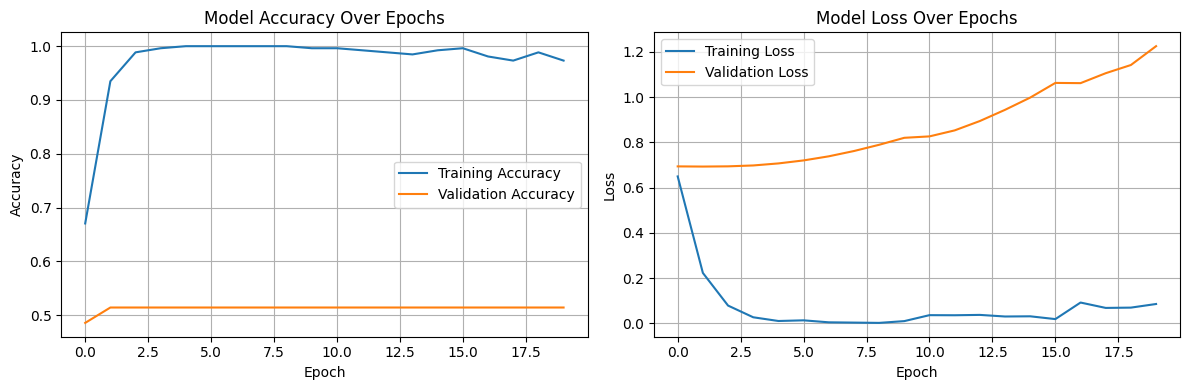

In [3]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

# Save the trained model
model.save("military_classifier_mobilenet.h5")

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# ResNet architecture

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
IMG_SIZE = 32

# Residual block (simplified for efficiency)
def residual_block(x, filters, strides=(1, 1), downsample=False):
    shortcut = x
    
    # First conv layer
    x = layers.Conv2D(filters, kernel_size=3, strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Second conv layer
    x = layers.Conv2D(filters, kernel_size=3, strides=(1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    
    # Downsample shortcut if needed
    if downsample or strides != (1, 1):
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    # Add shortcut and apply ReLU
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

# Build a lightweight ResNet model (inspired by ResNet-18)
def create_resnet_model():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Initial convolution
    x = layers.Conv2D(32, kernel_size=3, strides=(1, 1), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # 32x32 → 16x16
    
    # Residual blocks (simplified from ResNet-18)
    x = residual_block(x, filters=32, strides=(1, 1))  # Block 1
    x = residual_block(x, filters=32, strides=(1, 1))
    x = residual_block(x, filters=64, strides=(2, 2), downsample=True)  # 16x16 → 8x8, Block 2
    x = residual_block(x, filters=64, strides=(1, 1))
    
    # Global pooling and classification
    x = layers.GlobalAveragePooling2D()(x)  # 8x8 → 64-d vector
    x = layers.Dense(1, activation='sigmoid')(x)  # Binary output
    
    model = models.Model(inputs, outputs=x)
    return model

# Initialize and compile the model
model = create_resnet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_13 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ re_lu_13[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │      9,216 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_14 (ReLU)     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │      9,216 │ re_lu_14[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_15 (ReLU)     │ (None, 16, 16,    │          0 │ add[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │      9,216 │ re_lu_15[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_16 (ReLU)     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 16, 16,    │      9,216 │ re_lu_16[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_11[0][0] 

 Total params: 170,785 (667.13 KB)

 Trainable params: 169,825 (663.38 KB)

 Non-trainable params: 960 (3.75 KB)

## Train for 50 epochs

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.7257 - val_loss: 1.4086
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9944 - loss: 0.0216 - val_accuracy: 0.7371 - val_loss: 1.1992
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8000 - val_loss: 0.6743
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.8914 - val_loss: 0.3966
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9086 - val_loss: 0.2891
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9257 - val_loss: 0.2364
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9429 - val_loss: 0.2042
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8971 - val_loss:

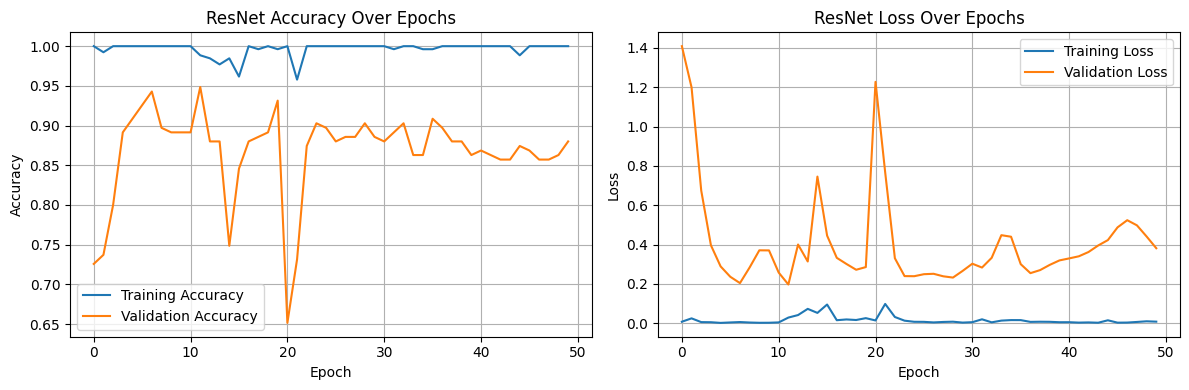

In [9]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_val, y_val))

# Save the trained model
model.save("military_classifier_resnet.h5")

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Inference from Model

In [24]:
# Load and preprocess a test image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Test on a sample image
test_image = preprocess_image("image copy.png")

prediction = model.predict(test_image)
print("Prediction:", "Military Person" if prediction[0][0] > 0.5 else "Person")

[ WARN:0@1379.248] global loadsave.cpp:268 findDecoder imread_('image copy.png'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
